# Preliminary Stuff

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from scipy.stats import poisson

# Part A/B

Define true and approximate probability densities.

In [2]:
def p_a(n,mean):
    return (1/mean)*(mean/(1+mean))**(n+1)
def p_a_approx(n, mean):
    return (1/mean)*np.exp(-n/mean)

def p_b(n,mean):
    return poisson.pmf(n, mean)
def p_b_approx(n, mean):
    return (1/np.sqrt(2*np.pi*mean))*np.exp(-(n-mean)**2 / (2*mean))

The means chosen are 9000, 10000, and 11000. The data is plotted between 8000 and 12000 for all distributions below.

In [3]:
means = [9000,10000,11000]
n = np.linspace(8000, 12000, 4001).astype(int)

p_part_a_1 = p_a(n, means[0])
p_part_a_2 = p_a(n, means[1])
p_part_a_3 = p_a(n, means[2])
p_part_a_1_approx = p_a_approx(n, means[0])
p_part_a_2_approx = p_a_approx(n, means[1])
p_part_a_3_approx = p_a_approx(n, means[2])

p_part_b_1 = p_b(n, means[0])
p_part_b_2 = p_b(n, means[1])
p_part_b_3 = p_b(n, means[2])
p_part_b_1_approx = p_b_approx(n, means[0])
p_part_b_2_approx = p_b_approx(n, means[1])
p_part_b_3_approx = p_b_approx(n, means[2])

Plot.

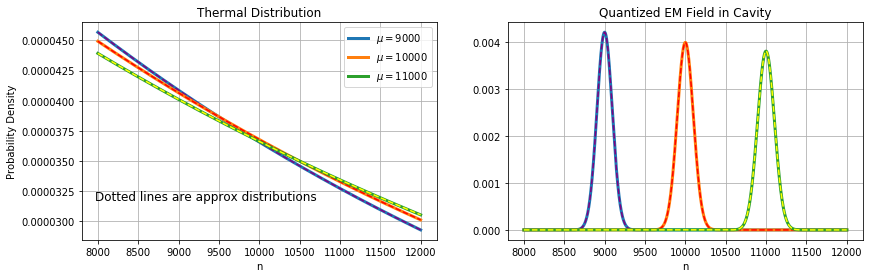

In [4]:
fig, ax = plt.subplots(1,2,figsize=(14,4))
ax[0].plot(n,p_part_a_1, label='$\mu=9000$', lw=3)
ax[0].plot(n,p_part_a_1_approx, color='Purple', ls='--')
ax[0].plot(n,p_part_a_2, label='$\mu=10000$', lw=3)
ax[0].plot(n,p_part_a_2_approx, color='Red', ls='--')
ax[0].plot(n,p_part_a_3, label='$\mu=11000$', lw=3)
ax[0].plot(n,p_part_a_3_approx, color='Yellow', ls='--')
ax[0].set_ylabel('Probability Density')
ax[0].set_xlabel('n')
ax[0].set_title(r'Thermal Distribution')
ax[0].grid()
ax[0].legend()
ax[0].text(0.35, 0.2, 'Dotted lines are approx distributions', horizontalalignment='center',
      verticalalignment='center', transform=ax[0].transAxes, size=12)

ax[1].plot(n,p_part_b_1, label='$\mu=9000$', lw=3)
ax[1].plot(n,p_part_b_1_approx, color='Purple', ls='--')
ax[1].plot(n,p_part_b_2, label='$\mu=10000$', lw=3)
ax[1].plot(n,p_part_b_2_approx, color='Red', ls='--')
ax[1].plot(n,p_part_b_3, label='$\mu=11000$', lw=3)
ax[1].plot(n,p_part_b_3_approx, color='Yellow', ls='--')
ax[1].set_xlabel('n')
ax[1].set_title(r'Quantized EM Field in Cavity')
ax[1].grid()

plt.show()

# Part F

Define the mean field and standard deviation.

In [5]:
def e_field_mean(chi, z_real, z_imag, r):
    return np.sqrt(2) * (z_real*np.exp(-r)*np.cos(chi) + z_imag*np.exp(r)*np.sin(chi) ) 
def e_field_std(chi, r):
    return np.sqrt(0.5*(np.exp(-2*r)*np.cos(chi)**2 + np.exp(2*r)*np.sin(chi)**2))

Define the plotting interval.

In [6]:
chi = np.linspace(0, 2*np.pi, 100)

Define the animation function.

In [7]:
def animate(i, chi, z_real=1, z_imag=1):
    
    r=0.01*i
    E2 = e_field_mean(chi, z_real=z_real, z_imag=z_imag, r=r)
    E2_std = e_field_std(chi, r=r)
    
    ax.clear()
    ax.plot(chi,E2, label=r'$\bar{\epsilon}$')
    ax.plot(chi,E2-E2_std, ls='-', color='k', label=r'$\bar{\epsilon} \pm \Delta \epsilon$')
    ax.plot(chi,E2+E2_std, ls='-', color='k')
    ax.set_xlabel('$\chi$')
    ax.set_ylabel('Magnitude')
    ax.set_title(r'$\Re[z]=${}; $\Im[z]=${}; $r=${:.2f}'.format(z_real, z_imag, r), fontsize=16)
    ax.legend(loc='lower left')

Create three different animations, one for Re[z]=1, Im[z]=1, one for Re[z]=3, Im[z]=0.5, and one for Re[z]=0.5, Im[z]=3. In each animation $r$ is scaled from being 0 (coherent state) to $r=5$ (a squeezed state).

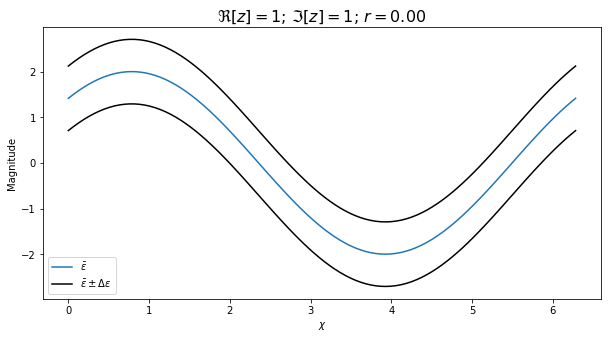

In [8]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
ani = animation.FuncAnimation(fig,animate,500, fargs=(chi, 1, 1))
ani.save('A3vid1.mp4', fps=20, dpi=200)
plt.show()

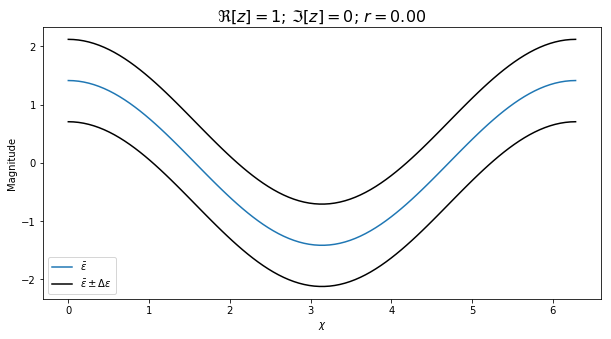

In [9]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
ani = animation.FuncAnimation(fig,animate,500, fargs=(chi, 1, 0))
ani.save('A3vid2.mp4', fps=20, dpi=200)
plt.show()

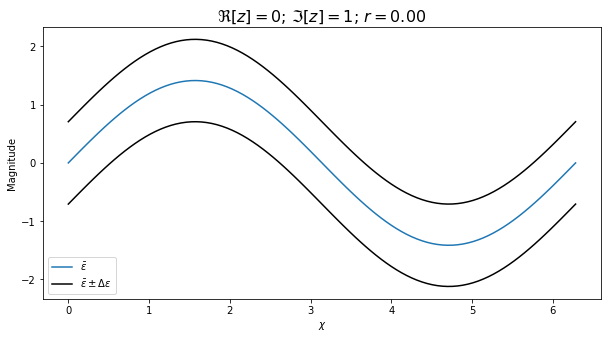

In [10]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
ani = animation.FuncAnimation(fig,animate,500, fargs=(chi, 0, 1))
ani.save('A3vid3.mp4', fps=20, dpi=200)
plt.show()

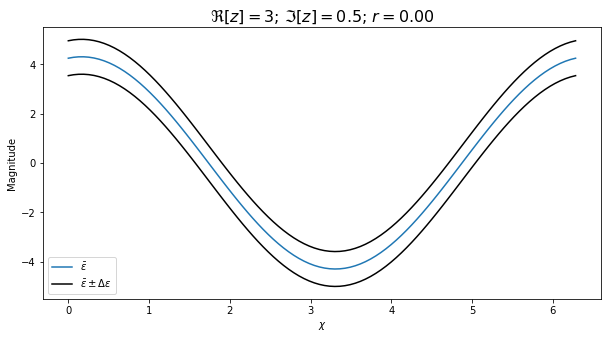

In [11]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
ani = animation.FuncAnimation(fig,animate,500, fargs=(chi, 3, 0.5))
ani.save('A3vid4.mp4', fps=20, dpi=200)
plt.show()

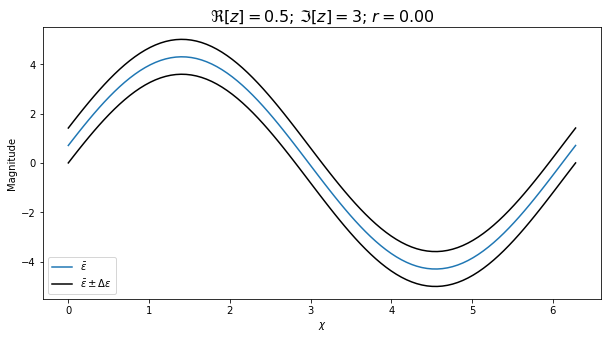

In [12]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
ani = animation.FuncAnimation(fig,animate,500, fargs=(chi, 0.5, 3))
ani.save('A3vid5.mp4', fps=20, dpi=200)
plt.show()

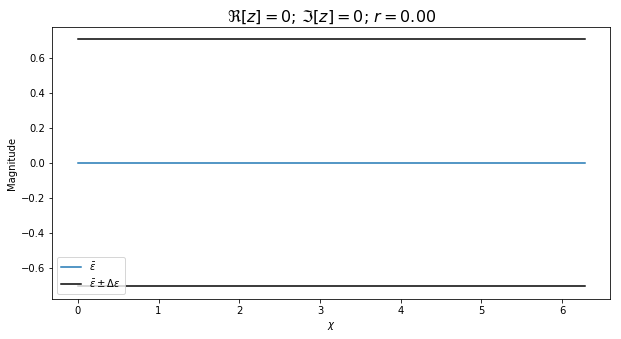

In [13]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
ani = animation.FuncAnimation(fig,animate,500, fargs=(chi, 0, 0))
ani.save('A3vid6.mp4', fps=20, dpi=200)
plt.show()

These plots do resemble the plots on the attached article. Note that $\chi$ is linearly related to time (the x-axis on the article plots is time.)

* The first animation resembles the first and second plot on the attached article.
* The second animation resembles the fourth plot.
* The third animation resembles the third plot.
* The fourth animation resembles the third plot.
* The fifth animation resembles the second plot.
* The sixth animation resembles the fifth plot.